# Курсовая работа

### Подготовка к работе 

#### Импорт библиотек 

In [199]:
import numpy as np
import pandas as pd
import random

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score as r2
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import norm

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#игнорирование warnings
import warnings
warnings.filterwarnings('ignore')

#### Пути до файлов

In [175]:
TRAIN_DATASET_PATH = r'D:/Kazakova/my_scripts/jupyter_notebook/train.csv'
TEST_DATASET_PATH = r'D:/Kazakova/my_scripts/jupyter_notebook/test.csv'

#### Загрузка данных

In [4]:
#train dataset
train_df = pd.read_csv(TRAIN_DATASET_PATH)
train_df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,11809,27,3.0,115.027311,NaN,10.0,4,10.0,2014,0.075424,B,B,11,3097,0,NaN,0,0,B,305018.871089
1,3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,B,B,30,6207,1,1183.0,1,0,B,177734.553407
2,8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,B,B,33,5261,0,240.0,3,1,B,282078.720850
3,2352,1,1.0,40.409907,NaN,1.0,10,22.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,168106.007630
4,13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,B,B,33,8667,2,NaN,0,6,B,343995.102962


In [176]:
#test dataset
test_df = pd.read_csv(TEST_DATASET_PATH)
test_df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
0,4567,44,1.0,36.847630,19.094182,5.0,5,9.0,1970,0.036122,B,B,24,4378,0,1036.0,1,1,B
1,5925,62,1.0,42.493907,42.568133,10.0,7,17.0,2017,0.072158,B,B,2,629,1,NaN,0,0,A
2,960,27,2.0,59.463678,NaN,9.0,19,19.0,1977,0.211401,B,B,9,1892,0,NaN,0,1,B
3,3848,23,3.0,49.646030,33.893825,6.0,2,2.0,1965,0.014073,B,B,2,475,0,NaN,0,0,B
4,746,74,1.0,53.837056,NaN,1.0,8,17.0,1977,0.309479,B,B,35,7715,4,990.0,0,6,B


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  int64  
 1   DistrictId     10000 non-null  int64  
 2   Rooms          10000 non-null  float64
 3   Square         10000 non-null  float64
 4   LifeSquare     7887 non-null   float64
 5   KitchenSquare  10000 non-null  float64
 6   Floor          10000 non-null  int64  
 7   HouseFloor     10000 non-null  float64
 8   HouseYear      10000 non-null  int64  
 9   Ecology_1      10000 non-null  float64
 10  Ecology_2      10000 non-null  object 
 11  Ecology_3      10000 non-null  object 
 12  Social_1       10000 non-null  int64  
 13  Social_2       10000 non-null  int64  
 14  Social_3       10000 non-null  int64  
 15  Healthcare_1   5202 non-null   float64
 16  Helthcare_2    10000 non-null  int64  
 17  Shops_1        10000 non-null  int64  
 18  Shops_2

#### Описание датасета

Источник данных - https://www.kaggle.com/competitions/real-estate-price-prediction-moscow/data

**Data fields:**
- Id - идентификационный номер квартиры
- DistrictId - идентификационный номер района
- Rooms - количество комнат
- Square - площадь
- LifeSquare - жилая площадь
- KitchenSquare - площадь кухни
- Floor - этаж
- HouseFloor - количество этажей в доме
- HouseYear - год постройки дома
- Ecology_1, Ecology_2, Ecology_3 - экологические показатели местности
- Social_1, Social_2, Social_3 - социальные показатели местности
- Healthcare_1, Helthcare_2 - показатели местности, связанные с охраной здоровья
- Shops_1, Shops_2 - показатели, связанные с наличием магазинов, торговых центров
- Price - цена квартиры

### Предобработка данных

#### Преобразование типов

In [7]:
train_df['Id'] = train_df['Id'].astype(str)
train_df['DistrictId'] = train_df['DistrictId'].astype(str)

#### Распределение целевой переменной

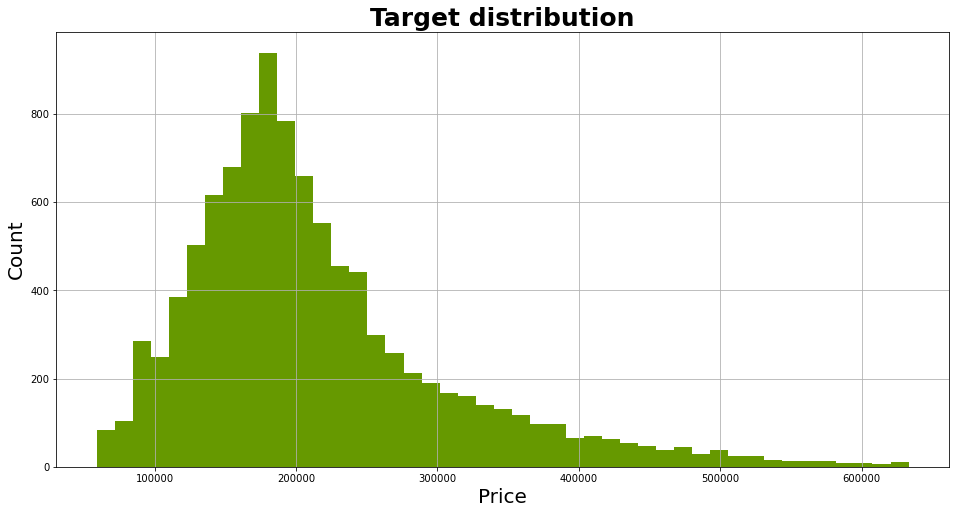

In [8]:
plt.figure(figsize = (16, 8))

train_df['Price'].hist(bins=45, color='#669900')
plt.ylabel('Count', fontsize = 20)
plt.xlabel('Price', fontsize = 20)

plt.title('Target distribution', fontsize = 25, fontweight='bold')
plt.show()

#### Количественные переменные

In [9]:
train_df.describe()

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


#### Качественные (номинативные) переменные

In [10]:
train_df.select_dtypes(include='object').columns.to_list()

['Id', 'DistrictId', 'Ecology_2', 'Ecology_3', 'Shops_2']

In [11]:
#DistricId
print(train_df['DistrictId'].value_counts().head())
num = len(train_df['DistrictId'].value_counts())
print('*' * 30)
print(f'Количество уникальных значений DistrictId - {num}')

27    851
1     652
23    565
6     511
9     294
Name: DistrictId, dtype: int64
******************************
Количество уникальных значений DistrictId - 205


In [12]:
train_df['Ecology_2'].value_counts()

B    9903
A      97
Name: Ecology_2, dtype: int64

In [13]:
train_df['Ecology_3'].value_counts()

B    9725
A     275
Name: Ecology_3, dtype: int64

In [14]:
train_df['Shops_2'].value_counts()

B    9175
A     825
Name: Shops_2, dtype: int64

#### Обработка выбросов

In [15]:
#Rooms
train_df['Rooms'].value_counts()

2.0     3880
1.0     3705
3.0     2235
4.0      150
5.0       18
0.0        8
10.0       2
19.0       1
6.0        1
Name: Rooms, dtype: int64

In [16]:
train_df.loc[train_df['Rooms'].isin([0, 10, 19]), 'Rooms'] = int(train_df['Rooms'].mode())

In [17]:
train_df.describe()

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,1.888800,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,0.812096,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,1.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,6.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


In [87]:
#Square && LifeSquare && KitchenSquare
train_df = train_df[train_df['Square'].isnull() |
                    (train_df['Square'] < train_df['Square'].quantile(.985)) |
                    (train_df['Square'] > train_df['Square'].quantile(.015))]

train_df = train_df[train_df['LifeSquare'].isnull() |
                    (train_df['LifeSquare'] < train_df['LifeSquare'].quantile(.985)) |
                    (train_df['LifeSquare'] > train_df['LifeSquare'].quantile(.015))]

train_df = train_df[train_df['KitchenSquare'].isnull() |
                    (train_df['KitchenSquare'] < train_df['KitchenSquare'].quantile(.985))]

train_df.loc[train_df['KitchenSquare'] < 3, 'KitchenSquare'] = 3

In [88]:
train_df.describe()

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Healthcare_2,Shops_1,Price,Ecology_2_bin,Ecology_3_bin,Shops_2_bin
count,9495.000000,9495.000000,9495.000000,9495.000000,9495.000000,9495.000000,9495.000000,9495.000000,9495.000000,9495.000000,9495.000000,9495.000000,9495.000000,9495.000000,9495.000000,9495.00000,9495.000000,9495.000000
mean,1.870774,55.192003,41.183759,6.044128,7.351448,12.912270,1983.896051,0.119038,24.832227,5371.943023,8.158504,852.753870,1.332175,4.285519,210834.836121,0.99010,0.972301,0.919115
std,0.805398,20.003849,79.498197,2.644567,5.001835,6.378286,17.895939,0.119491,17.530021,4004.165970,24.143876,795.178263,1.489671,4.842440,88892.215763,0.09901,0.164117,0.272672
min,1.000000,15.000000,10.000000,3.000000,1.000000,1.000000,1914.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028,0.00000,0.000000,0.000000
25%,1.000000,41.490700,24.915407,3.000000,3.000000,9.000000,1973.000000,0.017647,6.000000,1564.000000,0.000000,540.000000,0.000000,1.000000,153262.505650,1.00000,1.000000,1.000000
50%,2.000000,51.316358,36.122164,6.000000,6.000000,14.000000,1977.000000,0.075424,25.000000,5285.000000,2.000000,540.000000,1.000000,3.000000,190686.649293,1.00000,1.000000,1.000000
75%,2.000000,64.873433,48.983614,8.000000,10.000000,17.000000,1997.000000,0.195781,36.000000,7287.000000,5.000000,1015.000000,2.000000,6.000000,244969.219338,1.00000,1.000000,1.000000
max,6.000000,641.065193,7480.592129,11.000000,42.000000,117.000000,2020.000000,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570,1.00000,1.000000,1.000000


In [89]:
train_df.loc[train_df['Square'] < 15, 'Square'] = 15
train_df.loc[train_df['LifeSquare'] < 10, 'LifeSquare'] = 10
train_df.loc[train_df['KitchenSquare'] < 3, 'KitchenSquare'] =3

In [90]:
#HouseFloor && Floor
train_df['HouseFloor'].sort_values().unique()

array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,
        23.,  24.,  25.,  26.,  27.,  29.,  30.,  32.,  37.,  38.,  39.,
        40.,  44.,  45.,  48.,  99., 117.])

In [91]:
train_df['Floor'].sort_values().unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 31, 32, 33, 37, 42], dtype=int64)

In [92]:
train_df.loc[train_df['HouseFloor'] == 0, 'HouseFloor'] = int(train_df['HouseFloor'].mode())

In [93]:
floor_outliers = train_df.loc[train_df['Floor'] > train_df['HouseFloor']].index

In [94]:
train_df.loc[floor_outliers, 'Floor'] = train_df.loc[floor_outliers, 'HouseFloor'].apply(lambda x: random.randint(1, x))

In [95]:
train_df.describe()

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Healthcare_2,Shops_1,Price,Ecology_2_bin,Ecology_3_bin,Shops_2_bin
count,9495.000000,9495.000000,9495.000000,9495.000000,9495.000000,9495.000000,9495.000000,9495.000000,9495.000000,9495.000000,9495.000000,9495.000000,9495.000000,9495.000000,9495.000000,9495.00000,9495.000000,9495.000000
mean,1.870774,55.192003,41.183759,6.044128,7.351448,12.912270,1983.896051,0.119038,24.832227,5371.943023,8.158504,852.753870,1.332175,4.285519,210834.836121,0.99010,0.972301,0.919115
std,0.805398,20.003849,79.498197,2.644567,5.001835,6.378286,17.895939,0.119491,17.530021,4004.165970,24.143876,795.178263,1.489671,4.842440,88892.215763,0.09901,0.164117,0.272672
min,1.000000,15.000000,10.000000,3.000000,1.000000,1.000000,1914.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028,0.00000,0.000000,0.000000
25%,1.000000,41.490700,24.915407,3.000000,3.000000,9.000000,1973.000000,0.017647,6.000000,1564.000000,0.000000,540.000000,0.000000,1.000000,153262.505650,1.00000,1.000000,1.000000
50%,2.000000,51.316358,36.122164,6.000000,6.000000,14.000000,1977.000000,0.075424,25.000000,5285.000000,2.000000,540.000000,1.000000,3.000000,190686.649293,1.00000,1.000000,1.000000
75%,2.000000,64.873433,48.983614,8.000000,10.000000,17.000000,1997.000000,0.195781,36.000000,7287.000000,5.000000,1015.000000,2.000000,6.000000,244969.219338,1.00000,1.000000,1.000000
max,6.000000,641.065193,7480.592129,11.000000,42.000000,117.000000,2020.000000,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570,1.00000,1.000000,1.000000


In [27]:
#HouseYear
train_df['HouseYear'].value_counts()

1977        2627
2016         294
2017         293
2015         283
2014         198
            ... 
1947           1
1914           1
1928           1
4968           1
20052011       1
Name: HouseYear, Length: 94, dtype: int64

In [28]:
train_df.loc[train_df['HouseYear'] == 20052011,'HouseYear'] = 2011
train_df.loc[train_df['HouseYear'] == 4968, 'HouseYear'] = 1968

In [29]:
train_df['HouseYear'].sort_values().unique()

array([1914, 1917, 1918, 1919, 1928, 1929, 1930, 1931, 1932, 1933, 1934,
       1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1947, 1948, 1950,
       1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961,
       1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972,
       1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983,
       1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994,
       1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005,
       2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016,
       2017, 2018, 2019, 2020], dtype=int64)

#### Обработка пропущенных значений

In [30]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9811 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             9811 non-null   object 
 1   DistrictId     9811 non-null   object 
 2   Rooms          9811 non-null   float64
 3   Square         9811 non-null   float64
 4   LifeSquare     7707 non-null   float64
 5   KitchenSquare  9811 non-null   float64
 6   Floor          9811 non-null   int64  
 7   HouseFloor     9811 non-null   float64
 8   HouseYear      9811 non-null   int64  
 9   Ecology_1      9811 non-null   float64
 10  Ecology_2      9811 non-null   object 
 11  Ecology_3      9811 non-null   object 
 12  Social_1       9811 non-null   int64  
 13  Social_2       9811 non-null   int64  
 14  Social_3       9811 non-null   int64  
 15  Healthcare_1   5109 non-null   float64
 16  Helthcare_2    9811 non-null   int64  
 17  Shops_1        9811 non-null   int64  
 18  Shops_2 

In [31]:
#Healthcare_1
train_df.loc[train_df['Healthcare_1'].isnull(), 'Healthcare_1'] = int(train_df['Healthcare_1'].mode())

In [32]:
#LifeSquare
train_df.loc[train_df['LifeSquare'].isnull(), 'LifeSquare'] =\
train_df.loc[train_df['LifeSquare'].isnull(), 'Square'] -\
train_df.loc[train_df['LifeSquare'].isnull(), 'KitchenSquare']

In [33]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9811 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             9811 non-null   object 
 1   DistrictId     9811 non-null   object 
 2   Rooms          9811 non-null   float64
 3   Square         9811 non-null   float64
 4   LifeSquare     9811 non-null   float64
 5   KitchenSquare  9811 non-null   float64
 6   Floor          9811 non-null   int64  
 7   HouseFloor     9811 non-null   float64
 8   HouseYear      9811 non-null   int64  
 9   Ecology_1      9811 non-null   float64
 10  Ecology_2      9811 non-null   object 
 11  Ecology_3      9811 non-null   object 
 12  Social_1       9811 non-null   int64  
 13  Social_2       9811 non-null   int64  
 14  Social_3       9811 non-null   int64  
 15  Healthcare_1   9811 non-null   float64
 16  Helthcare_2    9811 non-null   int64  
 17  Shops_1        9811 non-null   int64  
 18  Shops_2 

In [34]:
train_df['Ecology_2_bin'] = train_df['Ecology_2'].replace({'A': 0, 'B': 1})
train_df['Ecology_3_bin'] = train_df['Ecology_3'].replace({'A': 0, 'B': 1})
train_df['Shops_2_bin'] = train_df['Shops_2'].replace({'A': 0, 'B': 1})

### Отбор признаков

In [35]:
train_df.columns

Index(['Id', 'DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare',
       'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1', 'Ecology_2',
       'Ecology_3', 'Social_1', 'Social_2', 'Social_3', 'Healthcare_1',
       'Helthcare_2', 'Shops_1', 'Shops_2', 'Price', 'Ecology_2_bin',
       'Ecology_3_bin', 'Shops_2_bin'],
      dtype='object')

In [36]:
#Исправление опечатки
train_df = train_df.rename(columns={'Helthcare_2': 'Healthcare_2'})

In [37]:
features = ['Id', 'DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare', 
                'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1', 'Ecology_2', 'Ecology_3',
                'Social_1', 'Social_2', 'Social_3', 'Healthcare_1', 'Healthcare_2',
                 'Shops_1', 'Shops_2', 'Ecology_2_bin', 'Ecology_3_bin', 'Shops_2_bin', 'Price']
target_name = 'Price'
Rdata=train_df.loc[:, features]

In [38]:
Rdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9811 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             9811 non-null   object 
 1   DistrictId     9811 non-null   object 
 2   Rooms          9811 non-null   float64
 3   Square         9811 non-null   float64
 4   LifeSquare     9811 non-null   float64
 5   KitchenSquare  9811 non-null   float64
 6   Floor          9811 non-null   int64  
 7   HouseFloor     9811 non-null   float64
 8   HouseYear      9811 non-null   int64  
 9   Ecology_1      9811 non-null   float64
 10  Ecology_2      9811 non-null   object 
 11  Ecology_3      9811 non-null   object 
 12  Social_1       9811 non-null   int64  
 13  Social_2       9811 non-null   int64  
 14  Social_3       9811 non-null   int64  
 15  Healthcare_1   9811 non-null   float64
 16  Healthcare_2   9811 non-null   int64  
 17  Shops_1        9811 non-null   int64  
 18  Shops_2 

Text(0.5, 1.0, 'Heatmap of the correlation between numerical attributes')

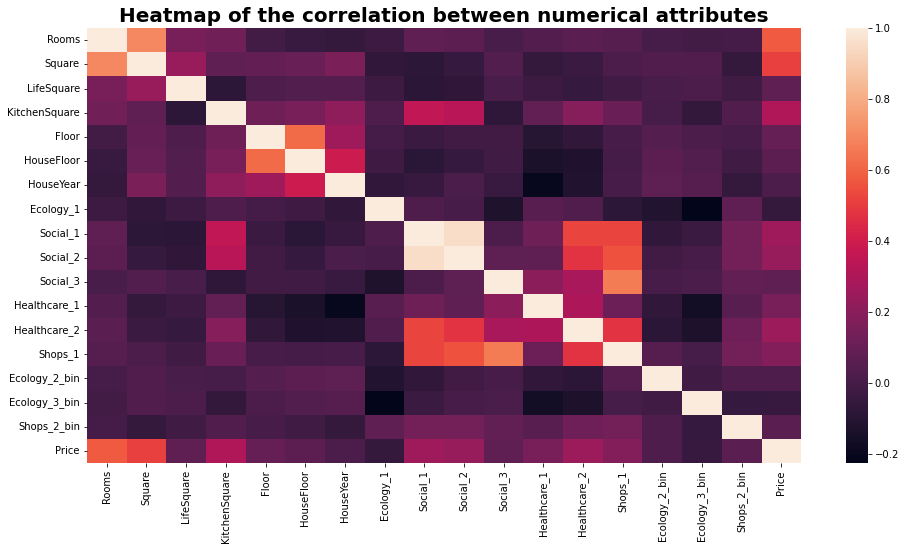

In [39]:
#Heatmap of the correlation between numerical attributes

plotfeats= ['Rooms', 'Square', 'LifeSquare', 'KitchenSquare', 'Floor', 'HouseFloor', 
           'HouseYear', 'Ecology_1', 'Social_1', 'Social_2', 'Social_3', 'Healthcare_1', 'Healthcare_2', 
           'Shops_1']

plt.figure(figsize = (16, 8))
sns.heatmap(Rdata.corr())
plt.title('Heatmap of the correlation between numerical attributes', fontsize = 20, fontweight='bold')

In [40]:
feature_names = ['Rooms', 'Square', 'LifeSquare', 'KitchenSquare', 
                'Floor', 'HouseFloor', 'HouseYear', 'Healthcare_2', 
                'Social_1', 'Social_2', 'Social_3', 'Healthcare_1', 'Shops_1', 'Ecology_1']

### Разбиение на тестовую и тренировочную выборку

In [41]:
x = train_df[feature_names]
y = train_df[target_name]

In [42]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, shuffle=True, random_state=42)

### Построение модели

In [43]:
#Подбор гиперпараметров (выполняется всего 1 раз)

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'bootstrap': bootstrap}

In [44]:
rf = RandomForestRegressor(random_state=42)
rf_random = GridSearchCV(estimator = rf, param_grid = random_grid, 
                                cv = 3, verbose=2, n_jobs = -1, scoring = 'r2')

In [46]:
#При проверке не запускать, т.к. гиперпараметры уже подобраны и использованы в обучении модели (времязатратный и ресурсозатратный шаг)

#rf_random.fit(x_train, y_train)

Fitting 3 folds for each of 480 candidates, totalling 1440 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100,
                                       110, None],
                         'max_features': ['auto', 'sqrt'],
                         'n_estimators': [100, 200, 300, 400, 500, 600, 700,
                                          800, 900, 1000]},
             scoring='r2', verbose=2)

In [47]:
#Отбор лучших гиперпараметров
#rf_random.best_params_

{'bootstrap': True,
 'max_depth': 20,
 'max_features': 'sqrt',
 'n_estimators': 800}

In [48]:
rf_model = RandomForestRegressor(max_depth = 20, max_features = 'sqrt', n_estimators = 800,
                                 bootstrap = True, random_state=42)
rf_model.fit(x_train, y_train)

RandomForestRegressor(max_depth=20, max_features='sqrt', n_estimators=800,
                      random_state=42)

In [49]:
y_train_preds = rf_model.predict(x_train)
y_test_preds = rf_model.predict(x_test)

In [50]:
#Расчет r2_score
R2 = r2(y_test, y_test_preds)
R2

0.7568086629227566

In [51]:
feature_importance = pd.DataFrame({'name':x.columns, 
                                   'feature_importance': rf_model.feature_importances_}, 
                                  columns=['feature_importance', 'name'])
feature_importance.sort_values(by='feature_importance', ascending=False)

,feature_importance,name
1,0.239532,Square
0,0.124407,Rooms
2,0.104842,LifeSquare
9,0.079870,Social_2
8,0.073843,Social_1
10,0.070862,Social_3
6,0.051656,HouseYear
3,0.049862,KitchenSquare
13,0.042006,Ecology_1
12,0.036795,Shops_1


In [54]:
#Evaluate GridSearch
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    print('*' * 30)
    
    return accuracy

base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_model.fit(x_train, y_train)
base_accuracy = evaluate(base_model, x_train, y_train)

best_model = rf_model
best_accuracy = evaluate(best_model, x_train, y_train)


print('Improvement of {:0.2f}%.'.format( 100 * (best_accuracy - base_accuracy) / base_accuracy))

Model Performance
Average Error: 12259.5928 degrees.
Accuracy = 93.50%.
******************************
Model Performance
Average Error: 11489.9826 degrees.
Accuracy = 93.73%.
******************************
Improvement of 0.25%.


### Предобработка тестовых данных

In [196]:
#Исправление опечатки
test_df = test_df.rename(columns={'Helthcare_2': 'Healthcare_2'})

#### Количественные переменные

In [177]:
test_df.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1
count,5000.000000,5000.000000,5000.000000,5000.000000,3959.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,2623.000000,5000.00000,5000.000000
mean,8412.595400,51.279200,1.910000,56.449500,36.158810,5.976800,8.632000,12.601000,1984.392600,0.119874,24.933800,5406.900000,8.262600,1146.657263,1.31940,4.242800
std,4832.674037,44.179466,0.838594,19.092787,17.825287,9.950018,5.483228,6.789213,18.573149,0.120070,17.532202,4026.614773,23.863762,1044.744231,1.47994,4.777365
min,1.000000,0.000000,0.000000,1.378543,0.333490,0.000000,1.000000,0.000000,1908.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.00000,0.000000
25%,4221.750000,21.000000,1.000000,41.906231,23.092026,1.000000,4.000000,9.000000,1973.000000,0.019509,6.000000,1564.000000,0.000000,325.000000,0.00000,1.000000
50%,8320.500000,37.000000,2.000000,52.921340,32.925087,6.000000,7.000000,12.000000,1977.000000,0.072158,25.000000,5285.000000,2.000000,900.000000,1.00000,3.000000
75%,12598.250000,77.000000,2.000000,66.285129,45.174091,9.000000,12.000000,17.000000,2000.000000,0.195781,36.000000,7287.000000,5.000000,1548.000000,2.00000,6.000000
max,16795.000000,212.000000,17.000000,223.453689,303.071094,620.000000,78.000000,99.000000,2020.000000,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.00000,23.000000


In [178]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             5000 non-null   int64  
 1   DistrictId     5000 non-null   int64  
 2   Rooms          5000 non-null   float64
 3   Square         5000 non-null   float64
 4   LifeSquare     3959 non-null   float64
 5   KitchenSquare  5000 non-null   float64
 6   Floor          5000 non-null   int64  
 7   HouseFloor     5000 non-null   float64
 8   HouseYear      5000 non-null   int64  
 9   Ecology_1      5000 non-null   float64
 10  Ecology_2      5000 non-null   object 
 11  Ecology_3      5000 non-null   object 
 12  Social_1       5000 non-null   int64  
 13  Social_2       5000 non-null   int64  
 14  Social_3       5000 non-null   int64  
 15  Healthcare_1   2623 non-null   float64
 16  Helthcare_2    5000 non-null   int64  
 17  Shops_1        5000 non-null   int64  
 18  Shops_2 

#### Качественные (номинативные) переменные

In [179]:
test_df['Id'] = test_df['Id'].astype(str)
test_df['DistrictId'] = test_df['DistrictId'].astype(str)

In [180]:
test_df.select_dtypes(include='object').columns.to_list()

['Id', 'DistrictId', 'Ecology_2', 'Ecology_3', 'Shops_2']

#### Обработка выбросов

In [181]:
#Rooms
test_df['Rooms'].value_counts()

2.0     2030
1.0     1769
3.0     1099
4.0       90
5.0        7
6.0        2
0.0        2
17.0       1
Name: Rooms, dtype: int64

In [182]:
test_df.loc[test_df['Rooms'].isin([0, 17]), 'Rooms'] = int(test_df['Rooms'].mode())

In [183]:
test_df.loc[test_df['Square'] < 15, 'Square'] = 15
test_df.loc[test_df['LifeSquare'] < 10, 'LifeSquare'] = 10
test_df.loc[test_df['KitchenSquare'] < 3, 'KitchenSquare'] =3

In [184]:
#HouseFloor && Floor
test_df['HouseFloor'].sort_values().unique()

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 36., 37., 39., 40.,
       48., 99.])

In [185]:
test_df['Floor'].sort_values().unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 31, 32, 33, 34, 38, 46,
       78], dtype=int64)

In [186]:
test_df.loc[test_df['HouseFloor'] == 0, 'HouseFloor'] = int(test_df['HouseFloor'].mode())

In [187]:
floor_outliers = test_df.loc[test_df['Floor'] > test_df['HouseFloor']].index

In [188]:
test_df.loc[floor_outliers, 'Floor'] = test_df.loc[floor_outliers, 'HouseFloor'].apply(lambda x: random.randint(1, x))

In [189]:
#HouseYear
test_df['HouseYear'].sort_values().unique()

array([1908, 1909, 1910, 1911, 1912, 1914, 1917, 1918, 1920, 1926, 1927,
       1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1937, 1938, 1939,
       1940, 1941, 1943, 1948, 1949, 1950, 1952, 1953, 1954, 1955, 1956,
       1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967,
       1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978,
       1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989,
       1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020], dtype=int64)

In [190]:
test_df.describe()

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1
count,5000.00000,5000.000000,3959.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,2623.000000,5000.00000,5000.000000
mean,1.90780,56.468722,36.341596,6.655000,7.518600,13.046400,1984.392600,0.119874,24.933800,5406.900000,8.262600,1146.657263,1.31940,4.242800
std,0.81008,19.045193,17.517364,9.640921,5.157536,6.499315,18.573149,0.120070,17.532202,4026.614773,23.863762,1044.744231,1.47994,4.777365
min,1.00000,15.000000,10.000000,3.000000,1.000000,1.000000,1908.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.00000,0.000000
25%,1.00000,41.906231,23.092026,3.000000,4.000000,9.000000,1973.000000,0.019509,6.000000,1564.000000,0.000000,325.000000,0.00000,1.000000
50%,2.00000,52.921340,32.925087,6.000000,6.000000,14.000000,1977.000000,0.072158,25.000000,5285.000000,2.000000,900.000000,1.00000,3.000000
75%,2.00000,66.285129,45.174091,9.000000,11.000000,17.000000,2000.000000,0.195781,36.000000,7287.000000,5.000000,1548.000000,2.00000,6.000000
max,6.00000,223.453689,303.071094,620.000000,46.000000,99.000000,2020.000000,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.00000,23.000000


#### Обработка пропущенных значений 

In [191]:
#Healthcare_
test_df.loc[test_df['Healthcare_1'].isnull(), 'Healthcare_1'] = int(test_df['Healthcare_1'].mode())

In [192]:
#LifeSquare
test_df.loc[test_df['LifeSquare'].isnull(), 'LifeSquare'] = int(test_df['LifeSquare'].mode())

In [193]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             5000 non-null   object 
 1   DistrictId     5000 non-null   object 
 2   Rooms          5000 non-null   float64
 3   Square         5000 non-null   float64
 4   LifeSquare     5000 non-null   float64
 5   KitchenSquare  5000 non-null   float64
 6   Floor          5000 non-null   int64  
 7   HouseFloor     5000 non-null   float64
 8   HouseYear      5000 non-null   int64  
 9   Ecology_1      5000 non-null   float64
 10  Ecology_2      5000 non-null   object 
 11  Ecology_3      5000 non-null   object 
 12  Social_1       5000 non-null   int64  
 13  Social_2       5000 non-null   int64  
 14  Social_3       5000 non-null   int64  
 15  Healthcare_1   5000 non-null   float64
 16  Helthcare_2    5000 non-null   int64  
 17  Shops_1        5000 non-null   int64  
 18  Shops_2 

### Результат

In [197]:
#Prediction
test_df['Price'] = rf_model.predict(test_df[feature_names])

mu = 213325.11 and sigma = 73533.82


Text(0.5, 1.0, 'Price distribution')

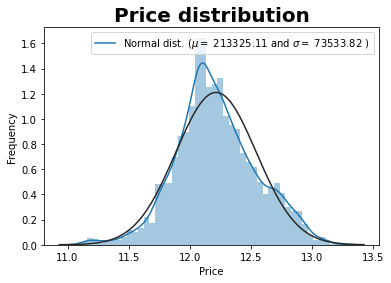

In [203]:
price_log = np.log1p(test_df['Price'])
sns.distplot(price_log, fit=norm)

mu, sigma = norm.fit(test_df['Price'])

print(f'mu = {mu:.2f} and sigma = {sigma:.2f}')

plt.legend(
    [f'Normal dist. ($\mu=$ {mu:.2f} and $\sigma=$ {sigma:.2f} )'], loc='best')
plt.ylabel('Frequency')
plt.title('Price distribution', fontsize = 20, fontweight = 'bold')

In [204]:
test_df[['Id', 'Price']].to_csv('PKazakova_predictions.csv', index=None)